# End-to-end trainig

In [1]:
LOAD_MODEL = None

In [2]:
# BAND = "r"
# NON_EXTENDED_ONLY = True

N_SRC = 10
BATCH_SIZE = 128
N_LCS = 300_000_000

DP1_ROOT = "../../data/dp1"
LSDB_WORKERS = 16
DEVICE = "cuda"

PLOT_MAGS = [18, 21, 25]

Dask Dashboard Link: http://127.0.0.1:8787/status


/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(floa

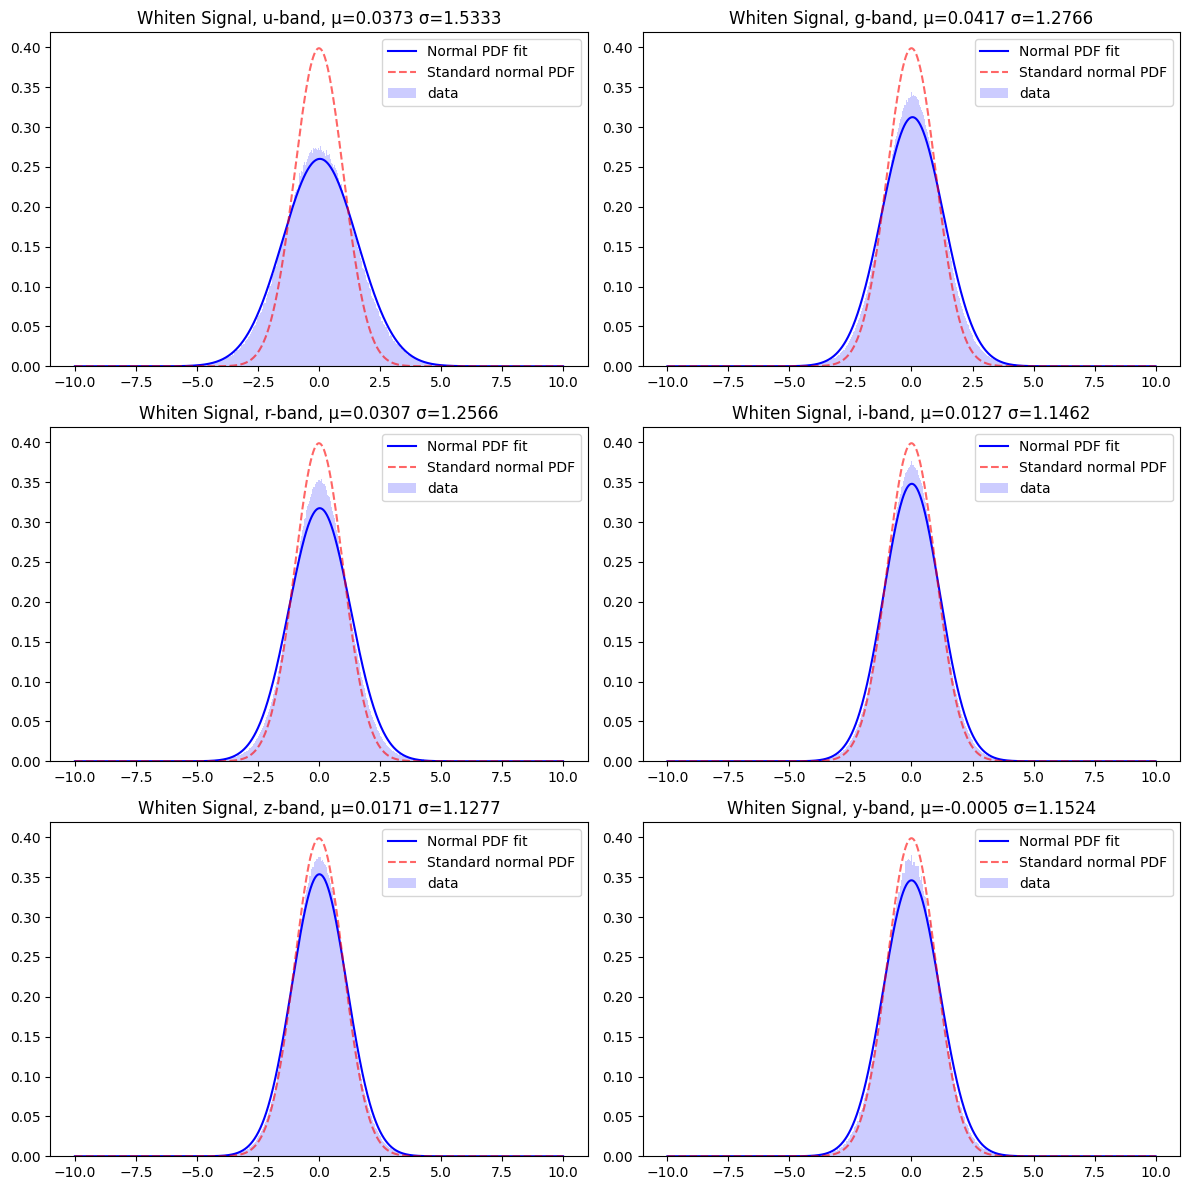

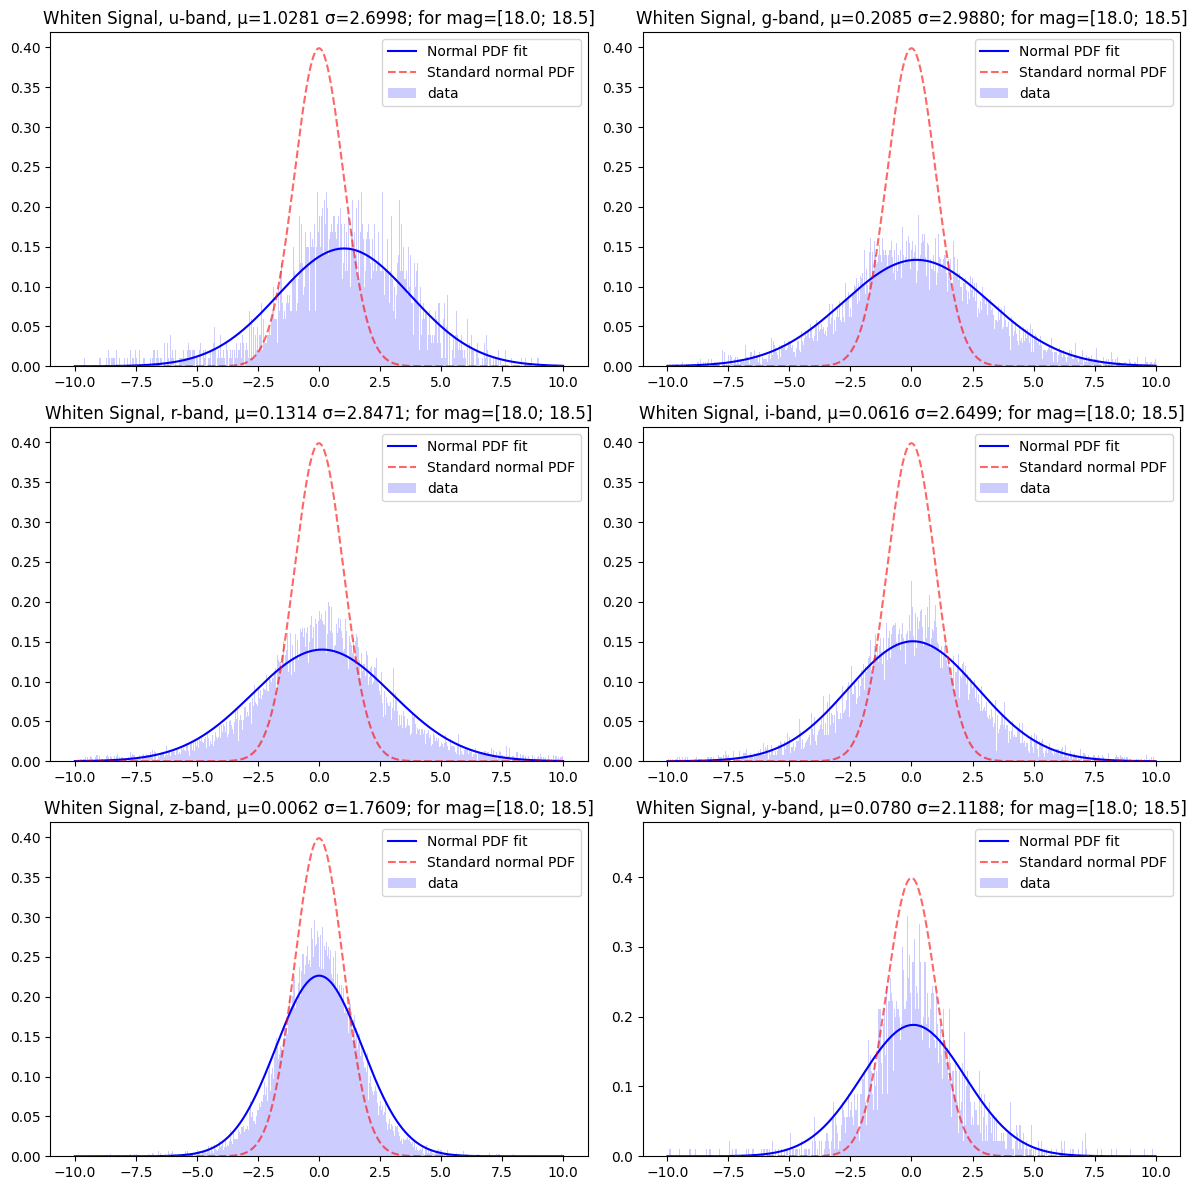

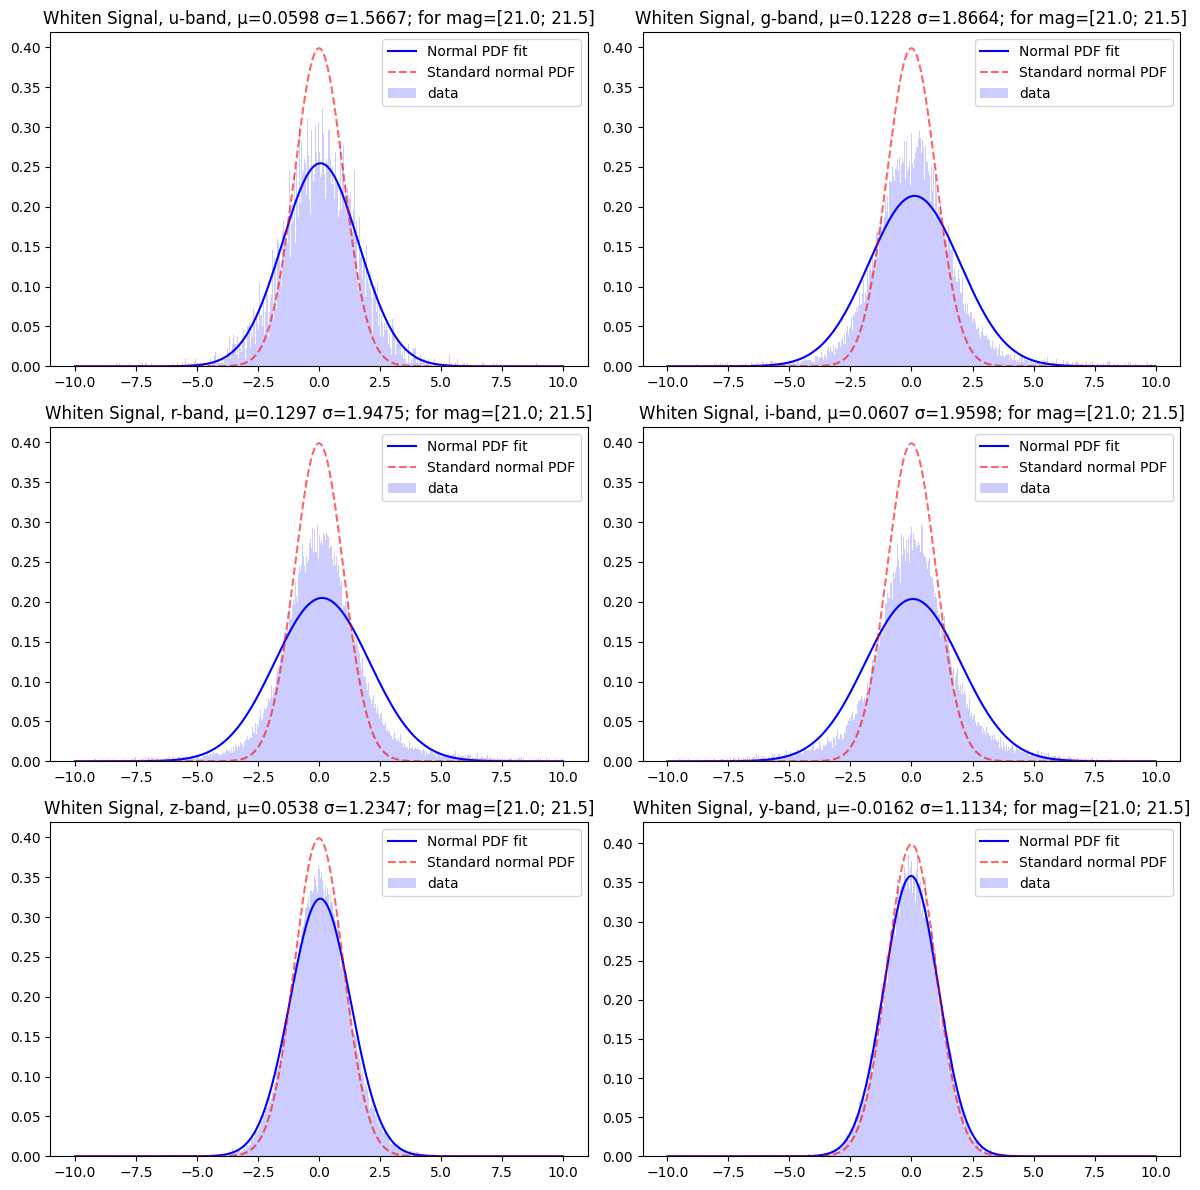

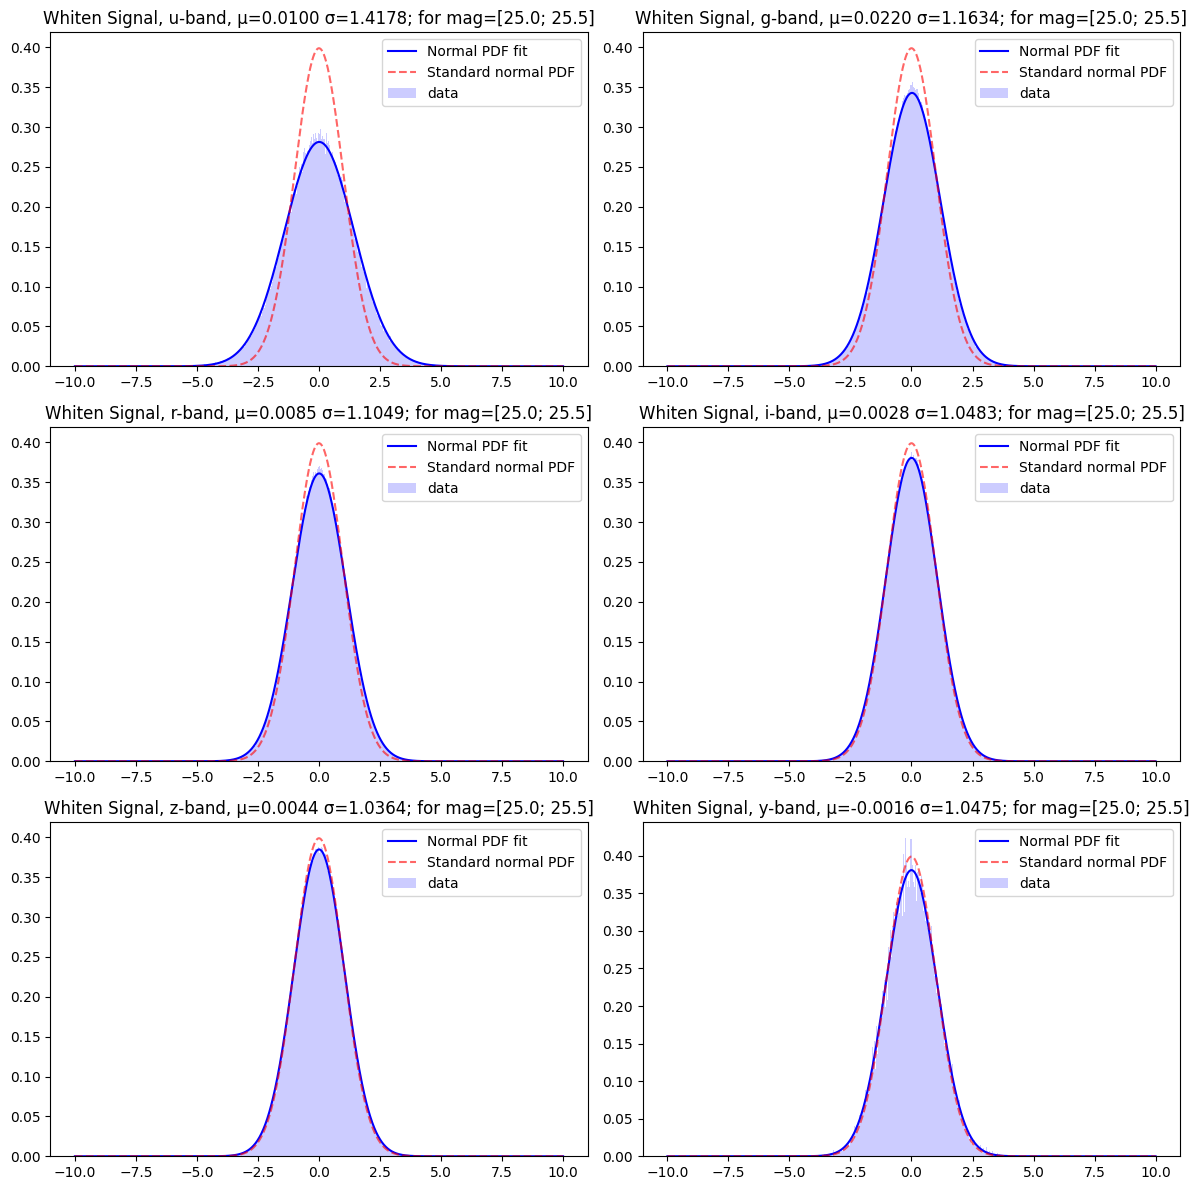

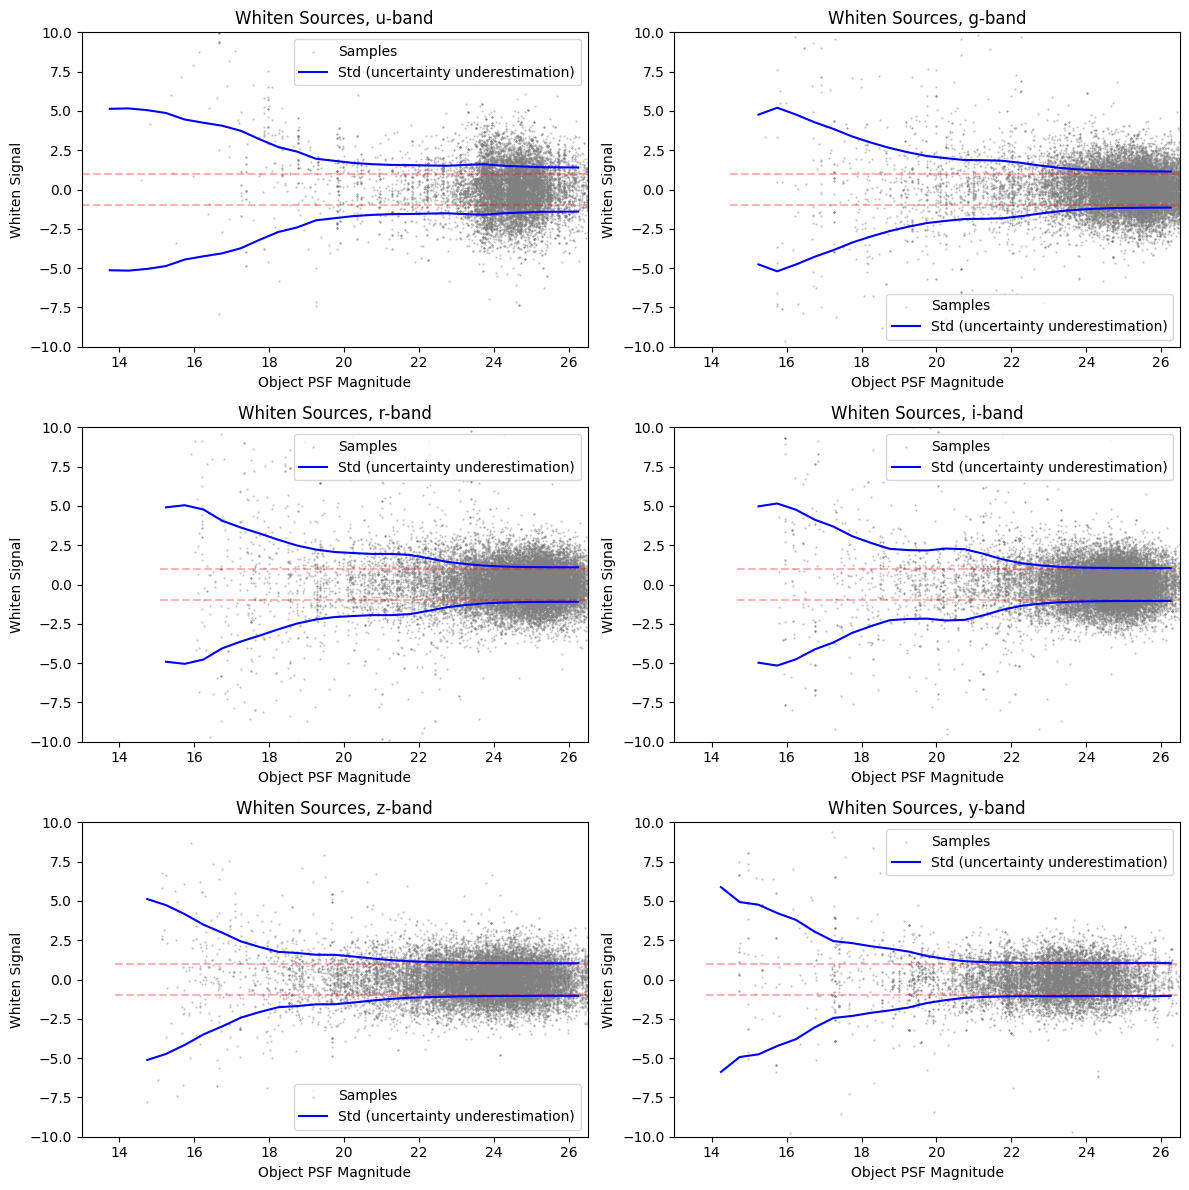

In [5]:
from uncle_val.pipelines import make_plots

make_plots(
    dp1_root=DP1_ROOT,
    hash_range=None,
    min_n_src=N_SRC,
    non_extended_only=False,
    n_workers=LSDB_WORKERS,
    model_path=None,
    n_samples=5,
    object_mags=[18, 21, 25],
)

In [4]:
# %load_ext tensorboard
# %tensorboard --logdir=runs

In [ ]:
from uncle_val.learning.losses import (
    minus_ln_chi2_prob_loss,
    kl_divergence_whiten_loss,
    epps_pulley_whiten_loss,
)
from uncle_val.pipelines import run_dp1_mlp

model_path, model_columns = run_dp1_mlp(
    dp1_root=DP1_ROOT,
    n_workers=LSDB_WORKERS,
    n_src=N_SRC,
    n_lcs=N_LCS,
    loss_fn=epps_pulley_whiten_loss(lmbd=None, soft=None, kind="accum"),
    lr=1e-4,
    val_losses={
        "Total Soften KL": kl_divergence_whiten_loss(soft=20.0, kind="accum", lmbd=None),
        "Total Soften -ln(p_χ²)": minus_ln_chi2_prob_loss(soft=20.0, kind="accum", lmbd=None),
    },
    train_batch_size=BATCH_SIZE,
    val_batch_size=4098,
    snapshot_every=min(N_LCS // BATCH_SIZE // 50, 2048),
    start_tfboard=True,
    output_root="./runs",
    device=DEVICE,
    load_model_path=LOAD_MODEL,
)


NOTE: Using experimental fast data loading logic. To disable, pass
    "--load_fast=false" and report issues on GitHub. More details:
    https://github.com/tensorflow/tensorboard/issues/4784



Tensorboard Link: http://localhost:6006/
Dask Dashboard Link: http://127.0.0.1:8787/status


Training batch:   0%|          | 0/2343750 [00:00<?, ?it/s]

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [ ]:
print(model_path)
print(model_columns)

### Train metrics

Dask Dashboard Link: http://127.0.0.1:8787/status


/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(floa

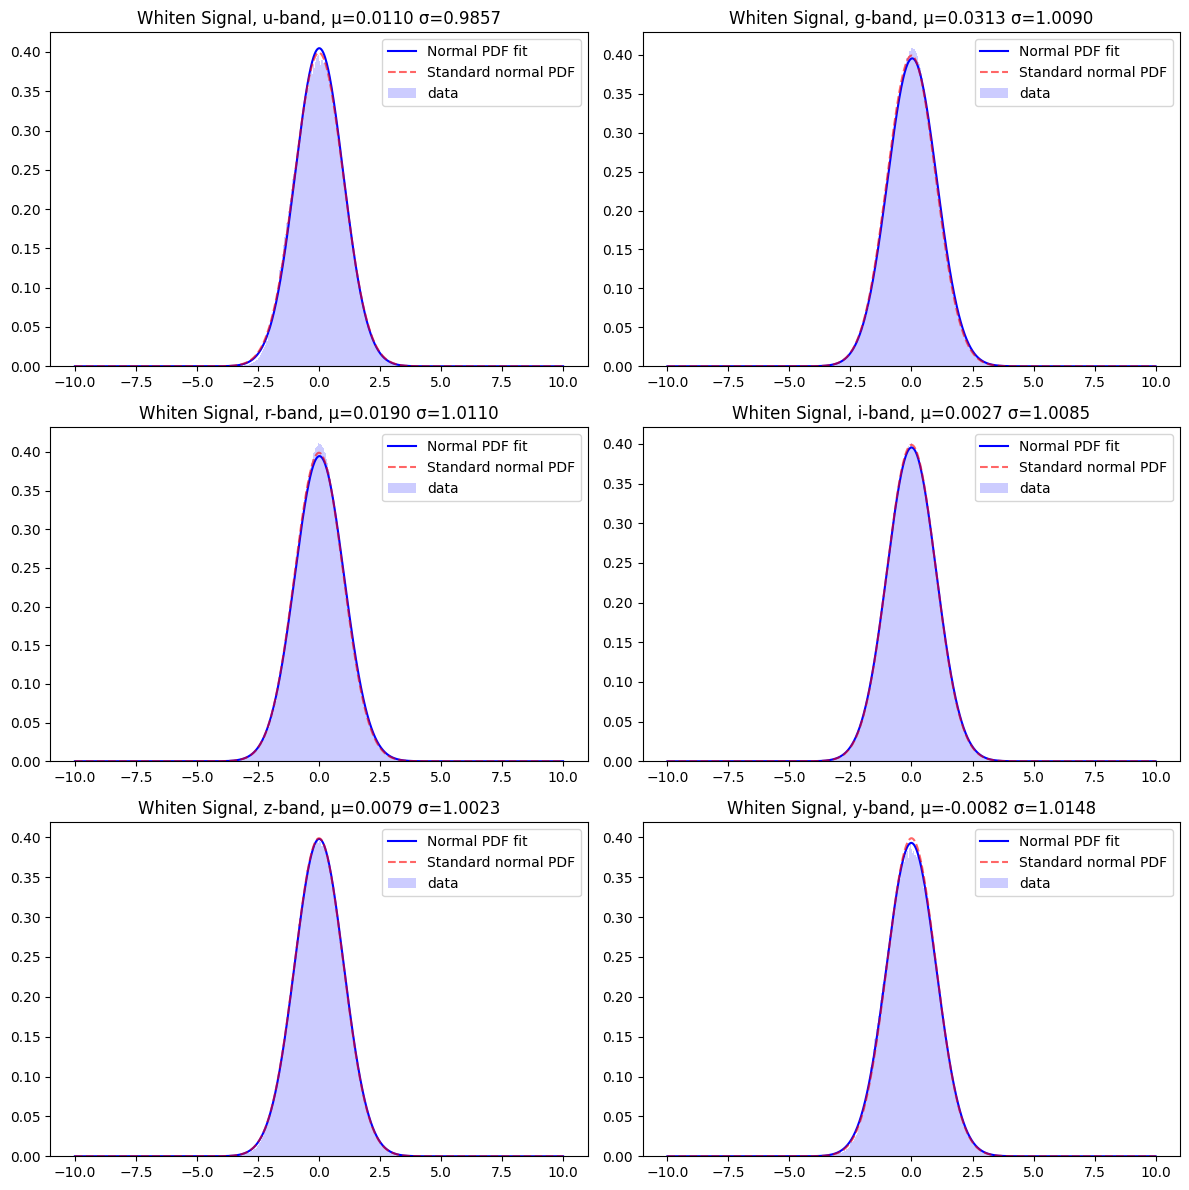

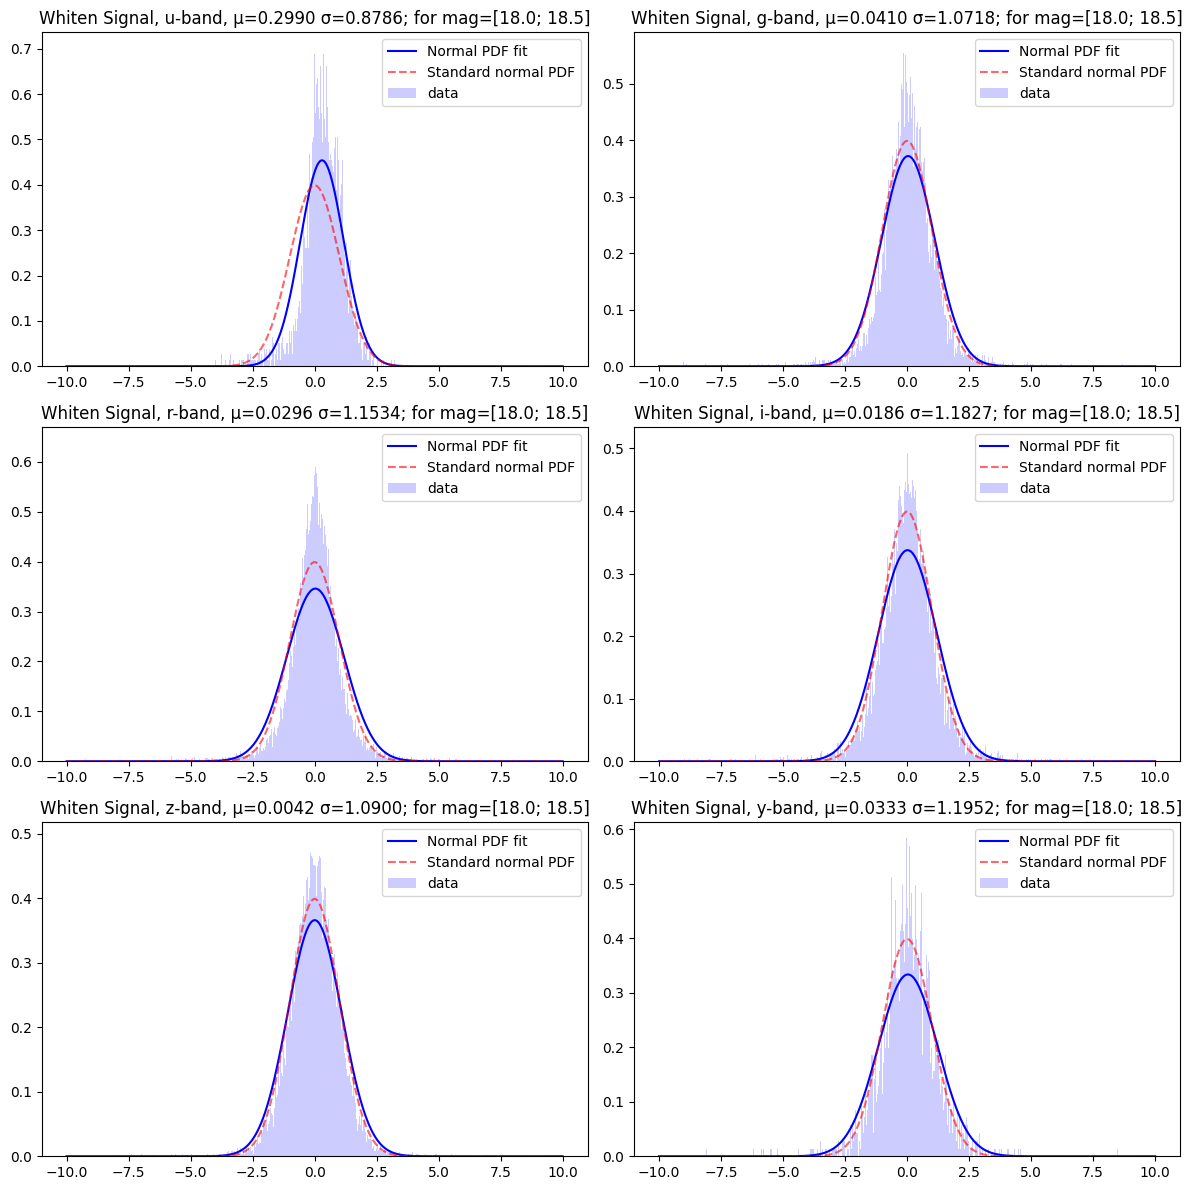

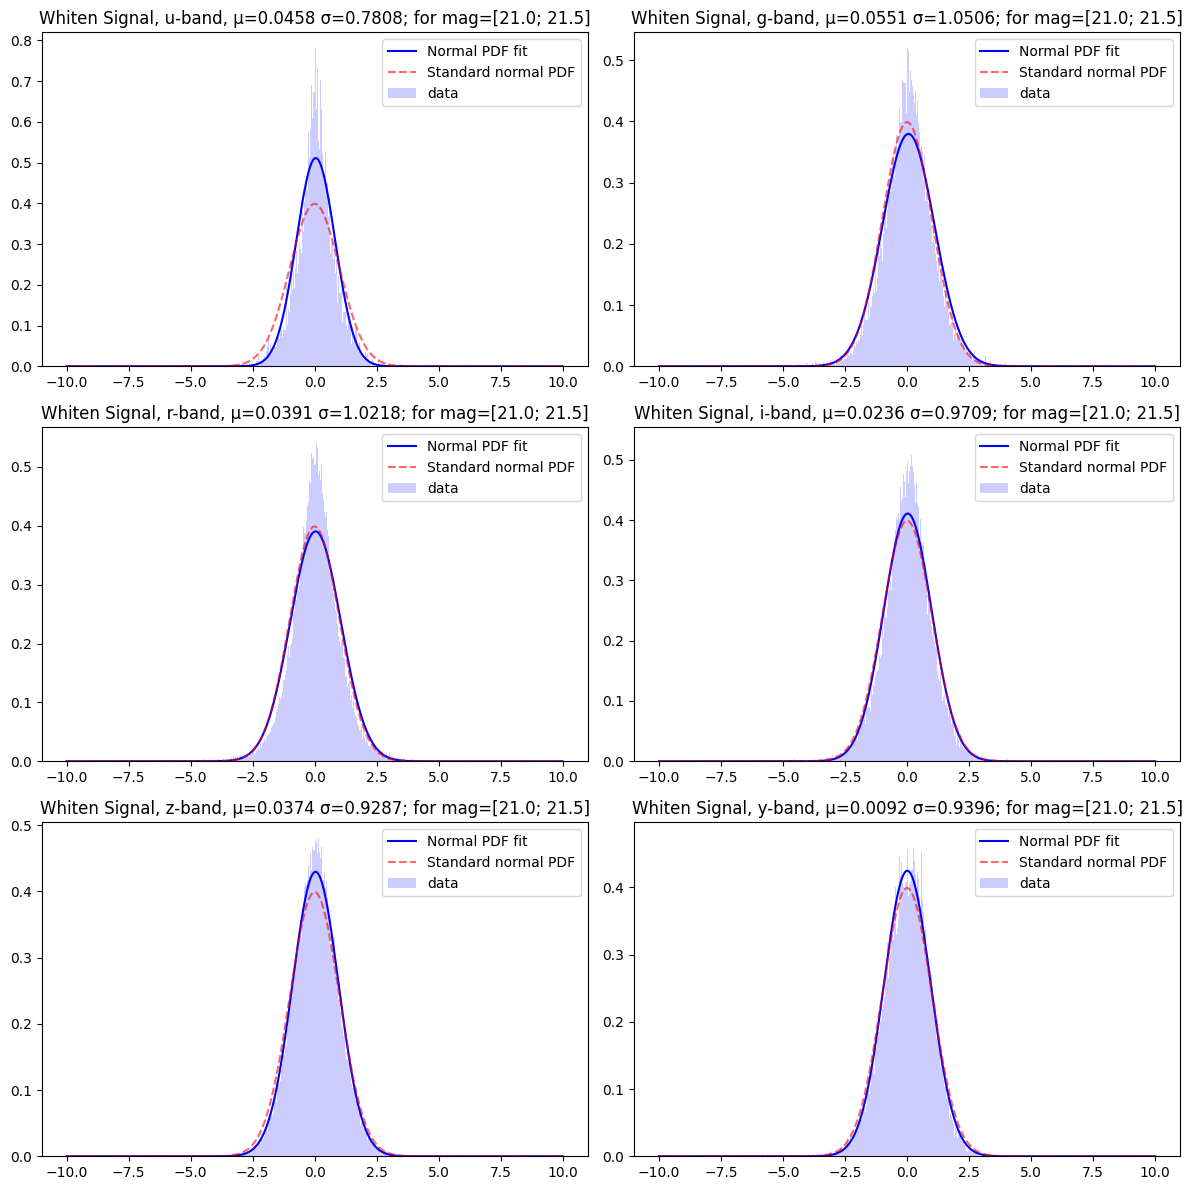

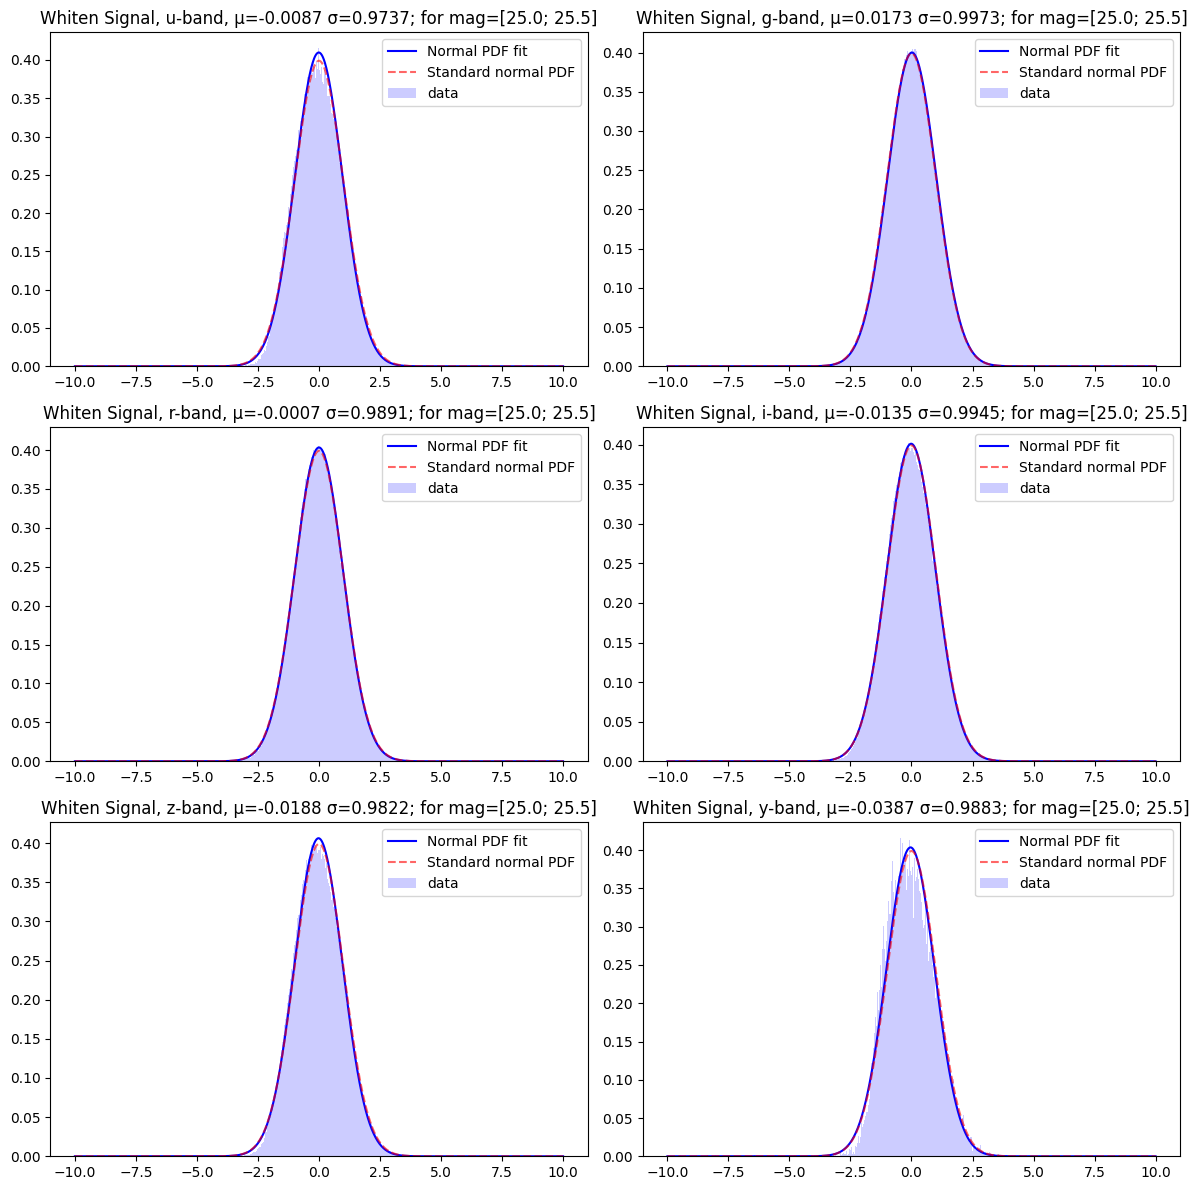

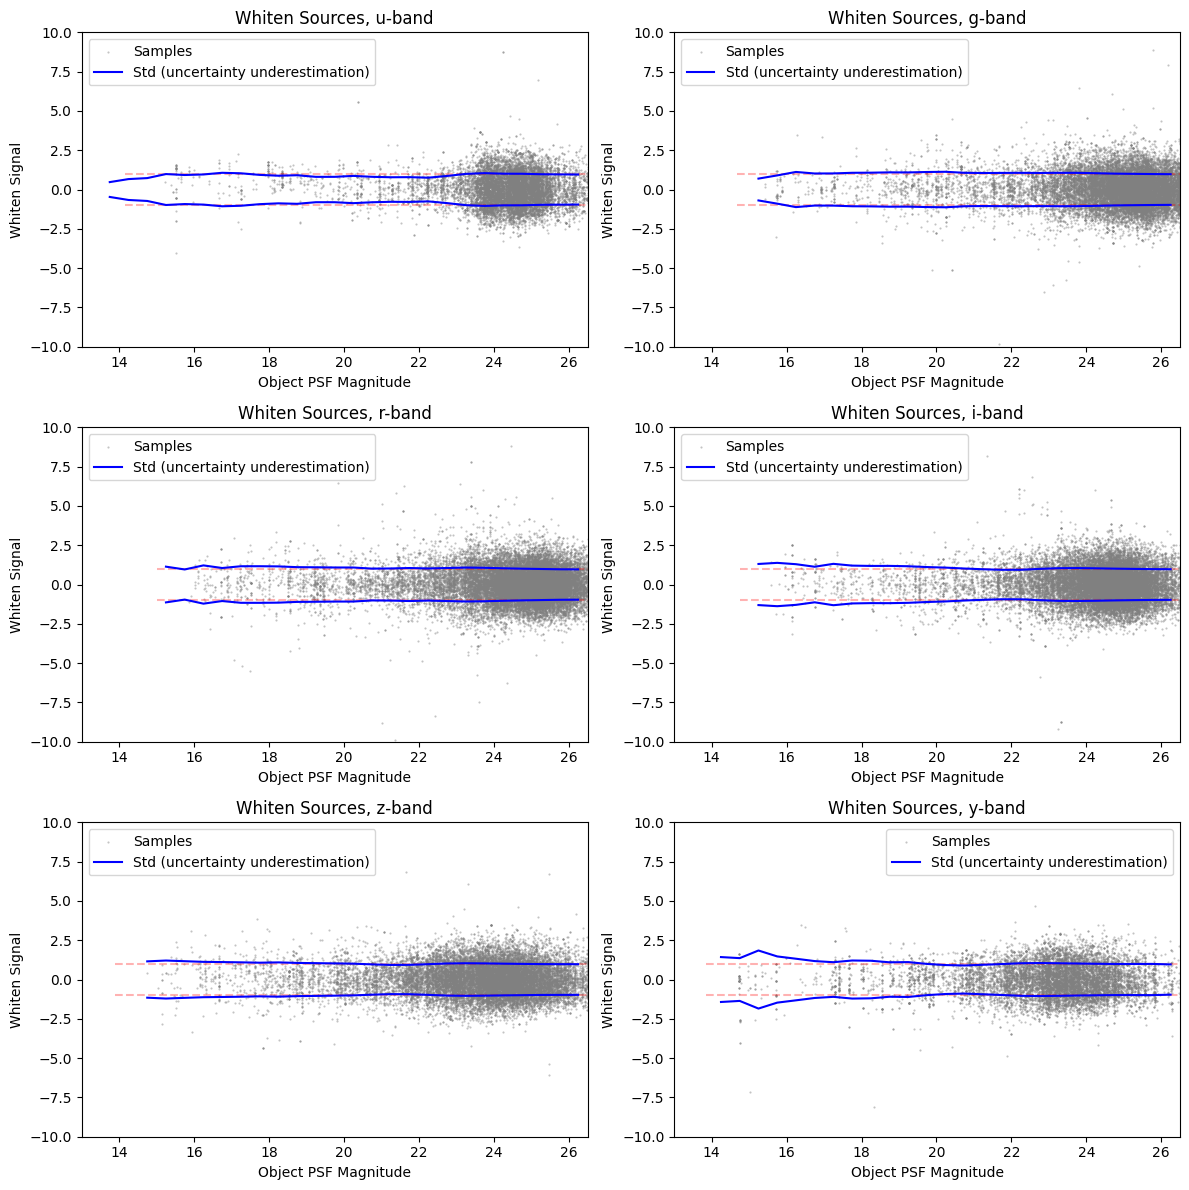

In [3]:
from uncle_val.pipelines import make_plots
from uncle_val.pipelines.splits import TRAIN_SPLIT

make_plots(
    dp1_root=DP1_ROOT,
    hash_range=TRAIN_SPLIT,
    min_n_src=N_SRC,
    non_extended_only=False,
    n_workers=LSDB_WORKERS,
    model_path=model_path,
    model_columns=model_columns,
    # model_path="./runs/2025-11-21_16-56/mlp.pt",
    # model_columns=['lc.x', 'lc.err', 'extendedness', 'lc.skyBg', 'lc.seeing', 'lc.expTime', 'is_u_band', 'is_g_band', 'is_r_band', 'is_i_band', 'is_z_band', 'is_y_band'],
    device=DEVICE,
    n_samples=5,
    object_mags=[18, 21, 25],
)

### Validation metrics

In [4]:
from uncle_val.pipelines import make_plots
from uncle_val.pipelines.splits import VALIDATION_SPLIT

make_plots(
    dp1_root=DP1_ROOT,
    hash_range=VALIDATION_SPLIT,
    min_n_src=N_SRC,
    non_extended_only=False,
    n_workers=LSDB_WORKERS,
    model_path=model_path,
    model_columns=model_columns,
    # model_path="runs/2025-10-10_20-39/mlp.pt",
    # model_columns=['lc.x', 'lc.err', 'extendedness', 'is_u_band', 'is_g_band', 'is_r_band', 'is_i_band', 'is_z_band', 'is_y_band'],
    device=DEVICE,
    n_samples=5,
    object_mags=[18, 21, 25],
)

NameError: name 'model_path' is not defined

### Test metrics

Dask Dashboard Link: http://127.0.0.1:8787/status


/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 2, 'A', False, aligned=True), Array(float64, 2, 'C', False, aligned=True))
  transform_operator = whitening_operator(sigma, np=np)
/home/phys/malanchev-CMU/uncle-val/src/uncle_val/whitening.py:75: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(floa

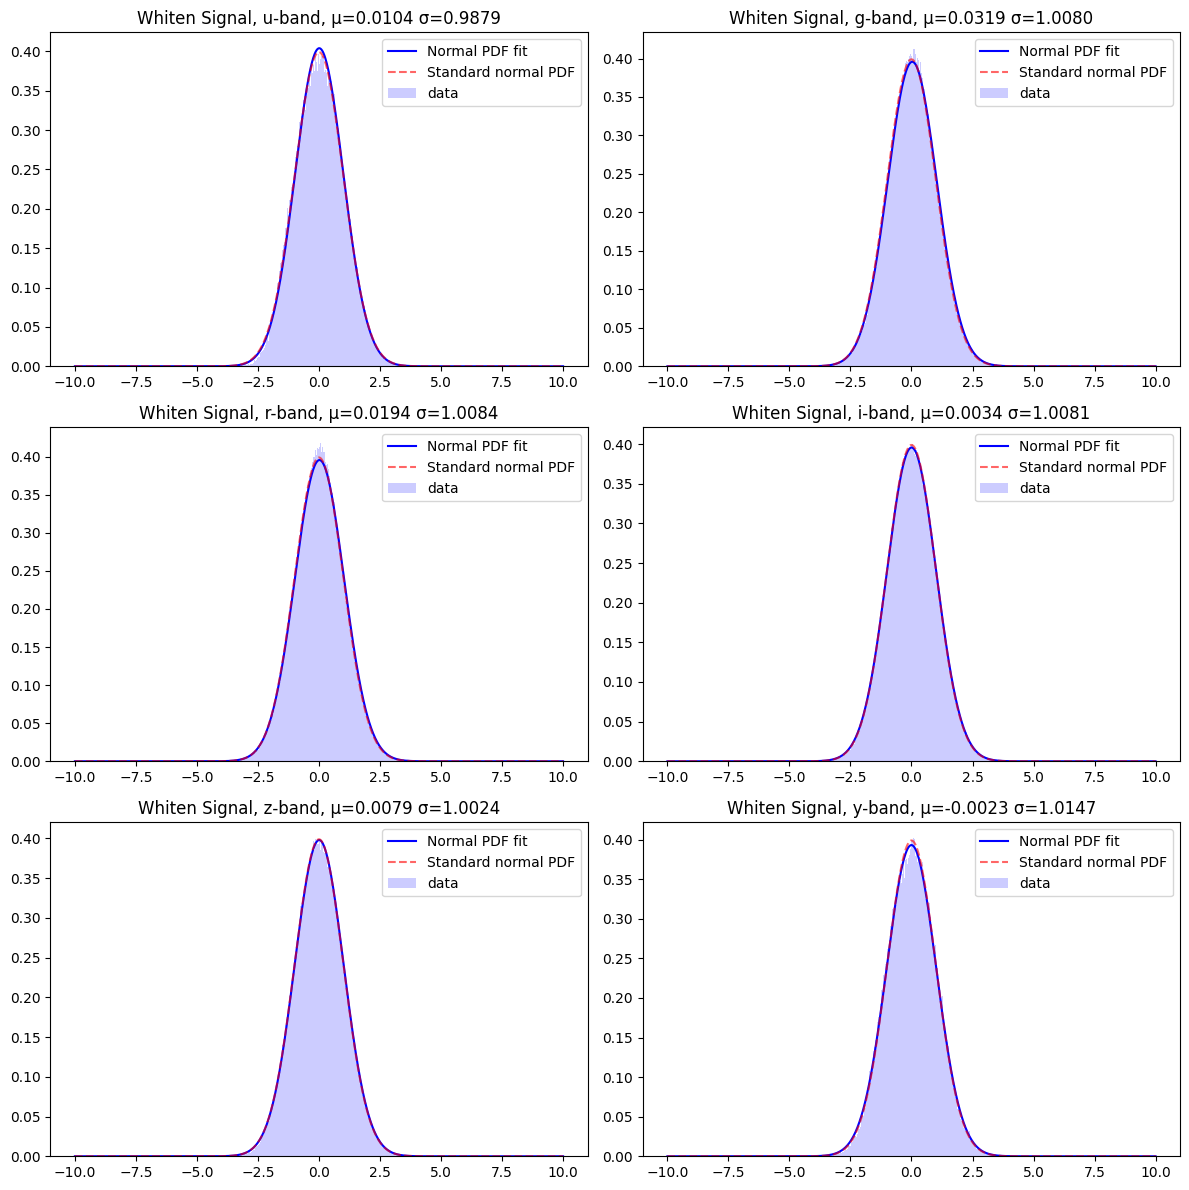

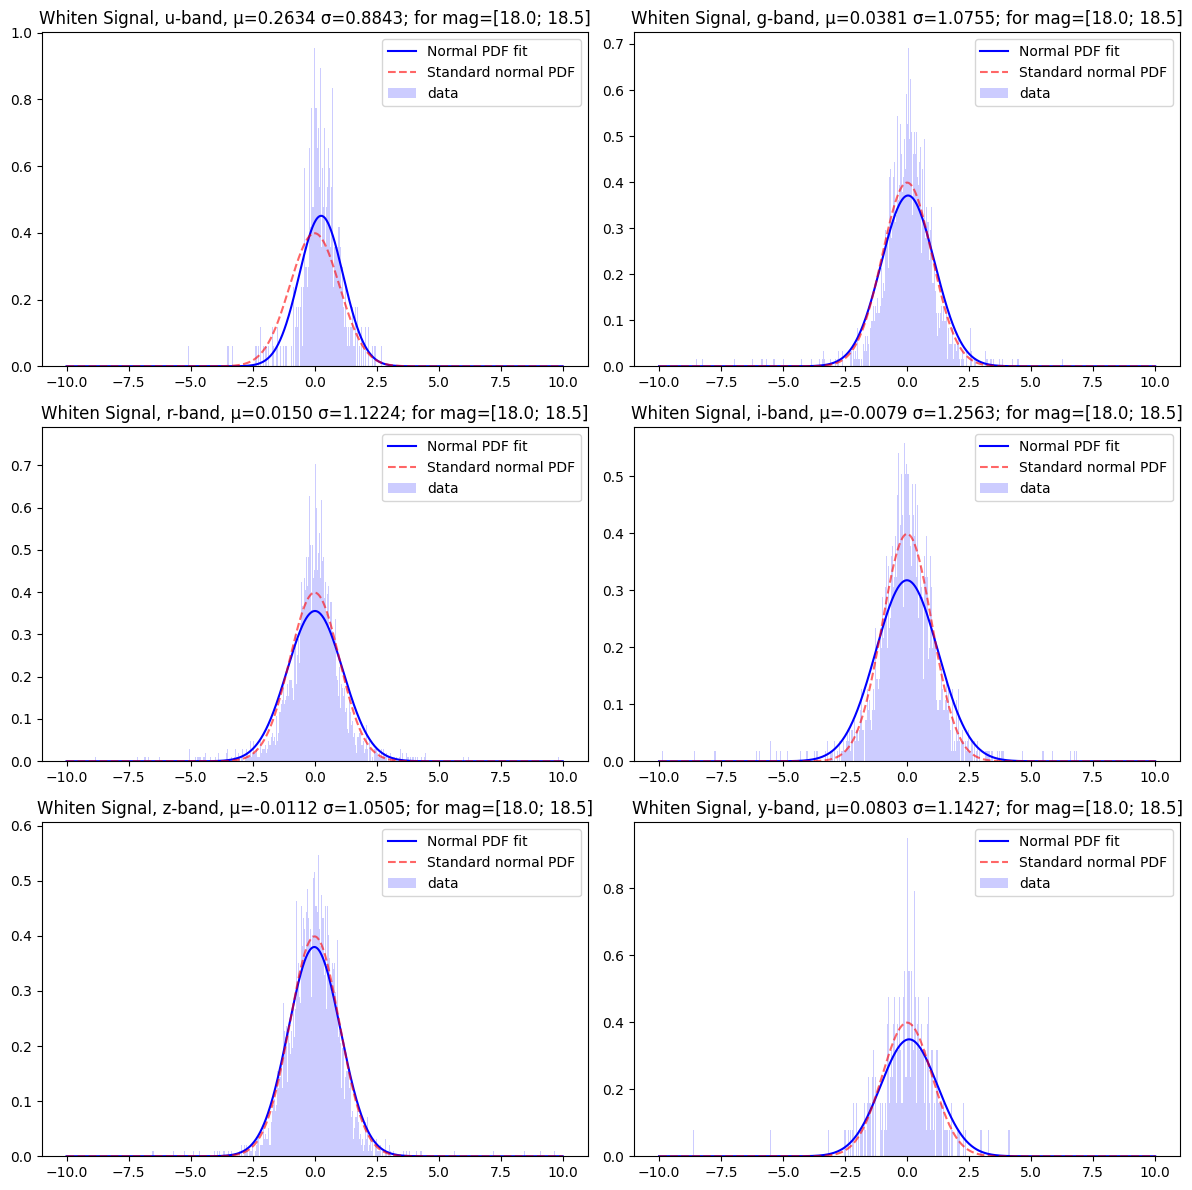

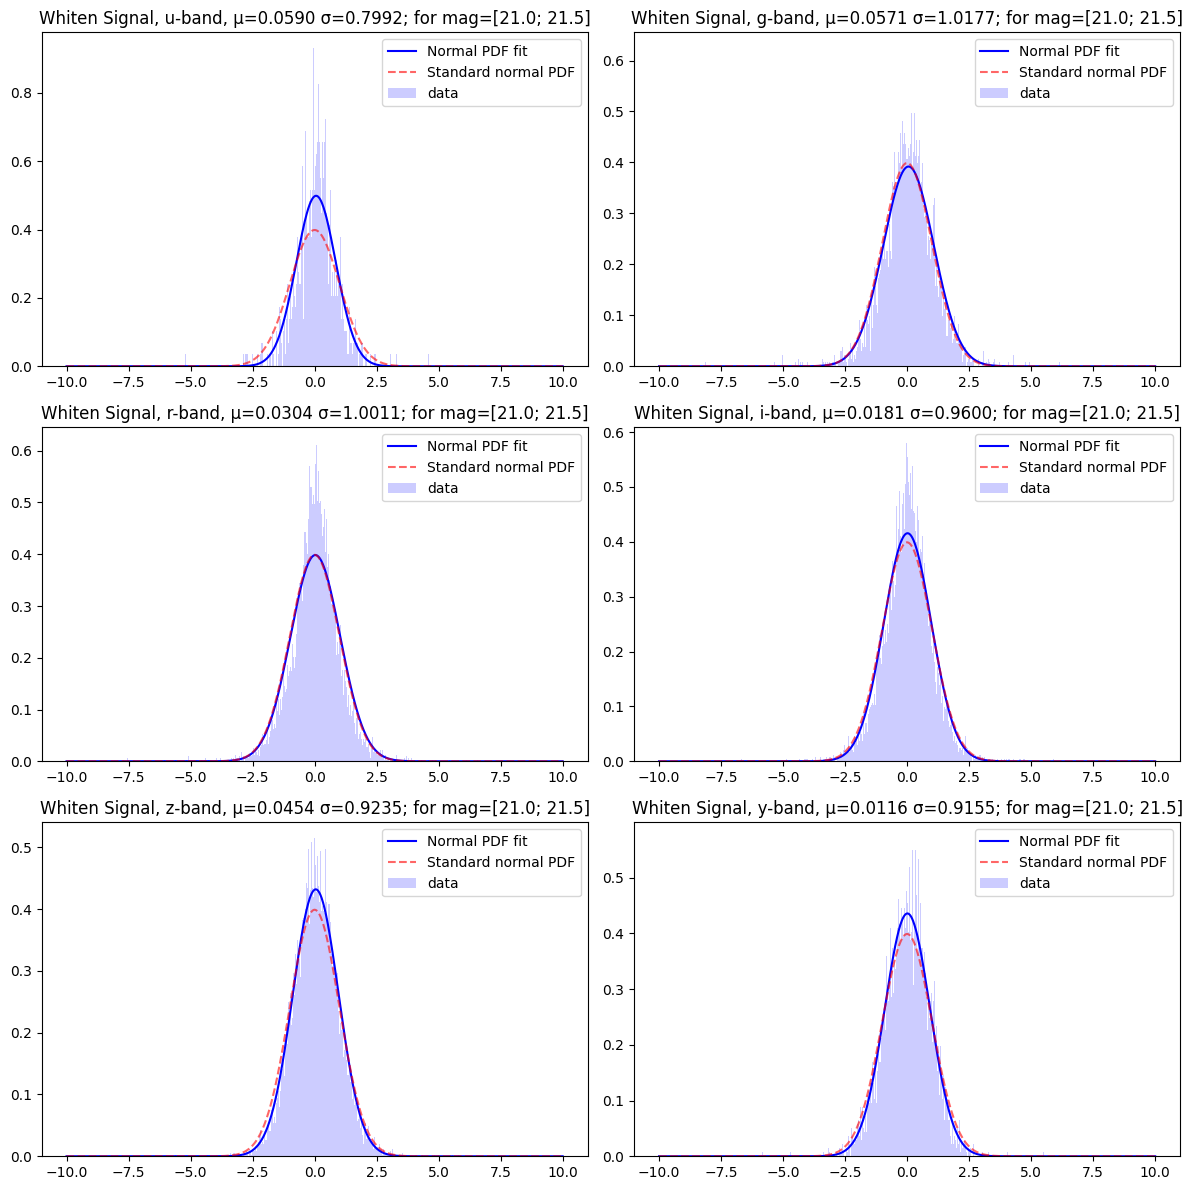

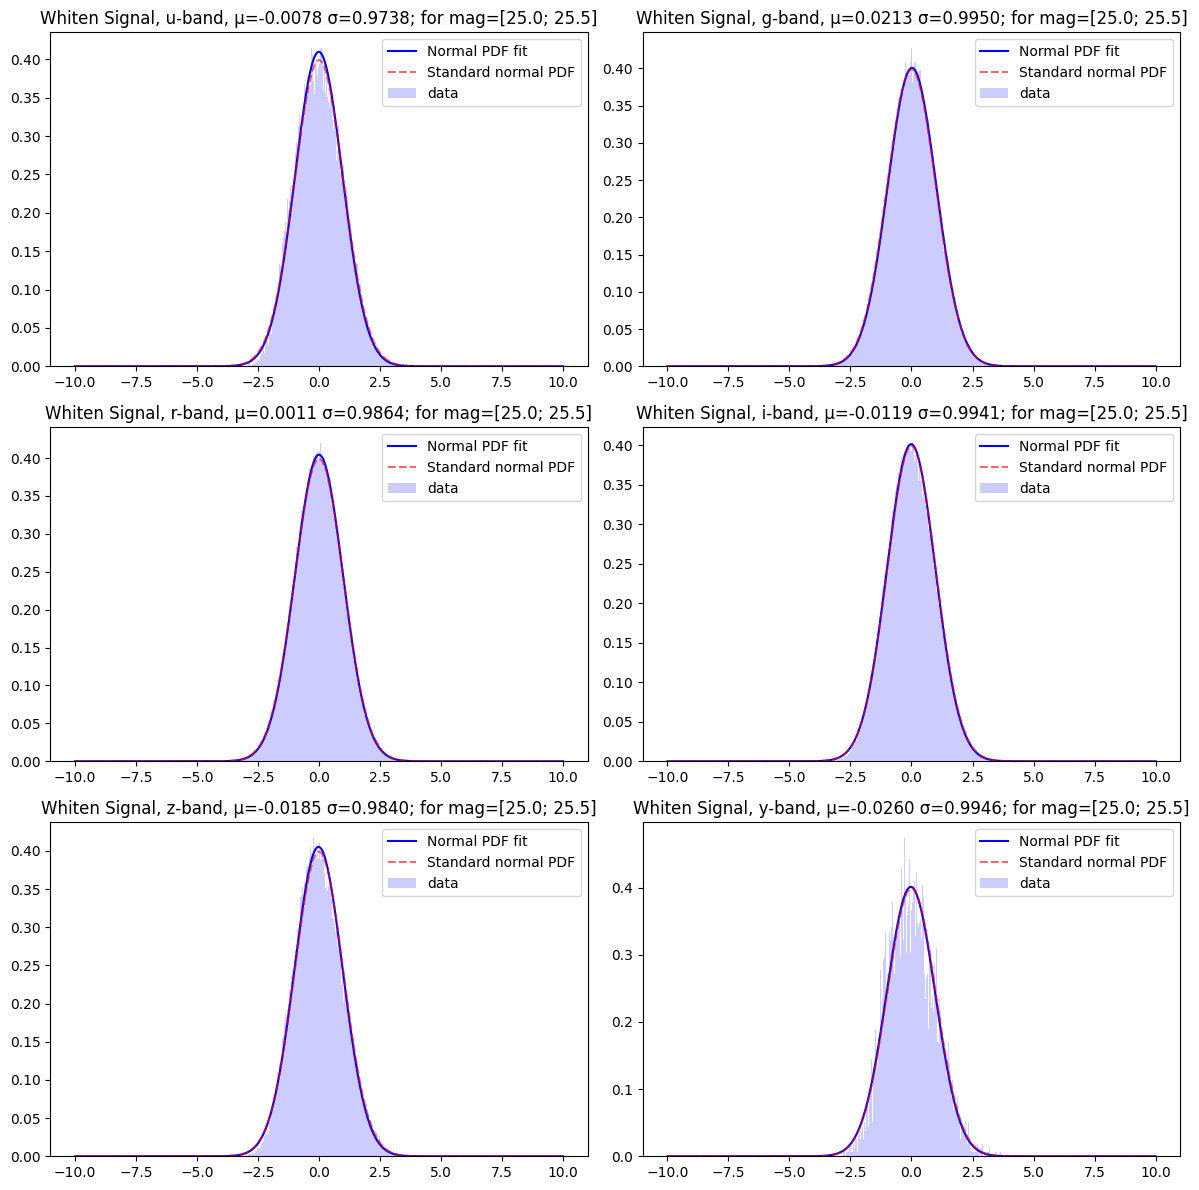

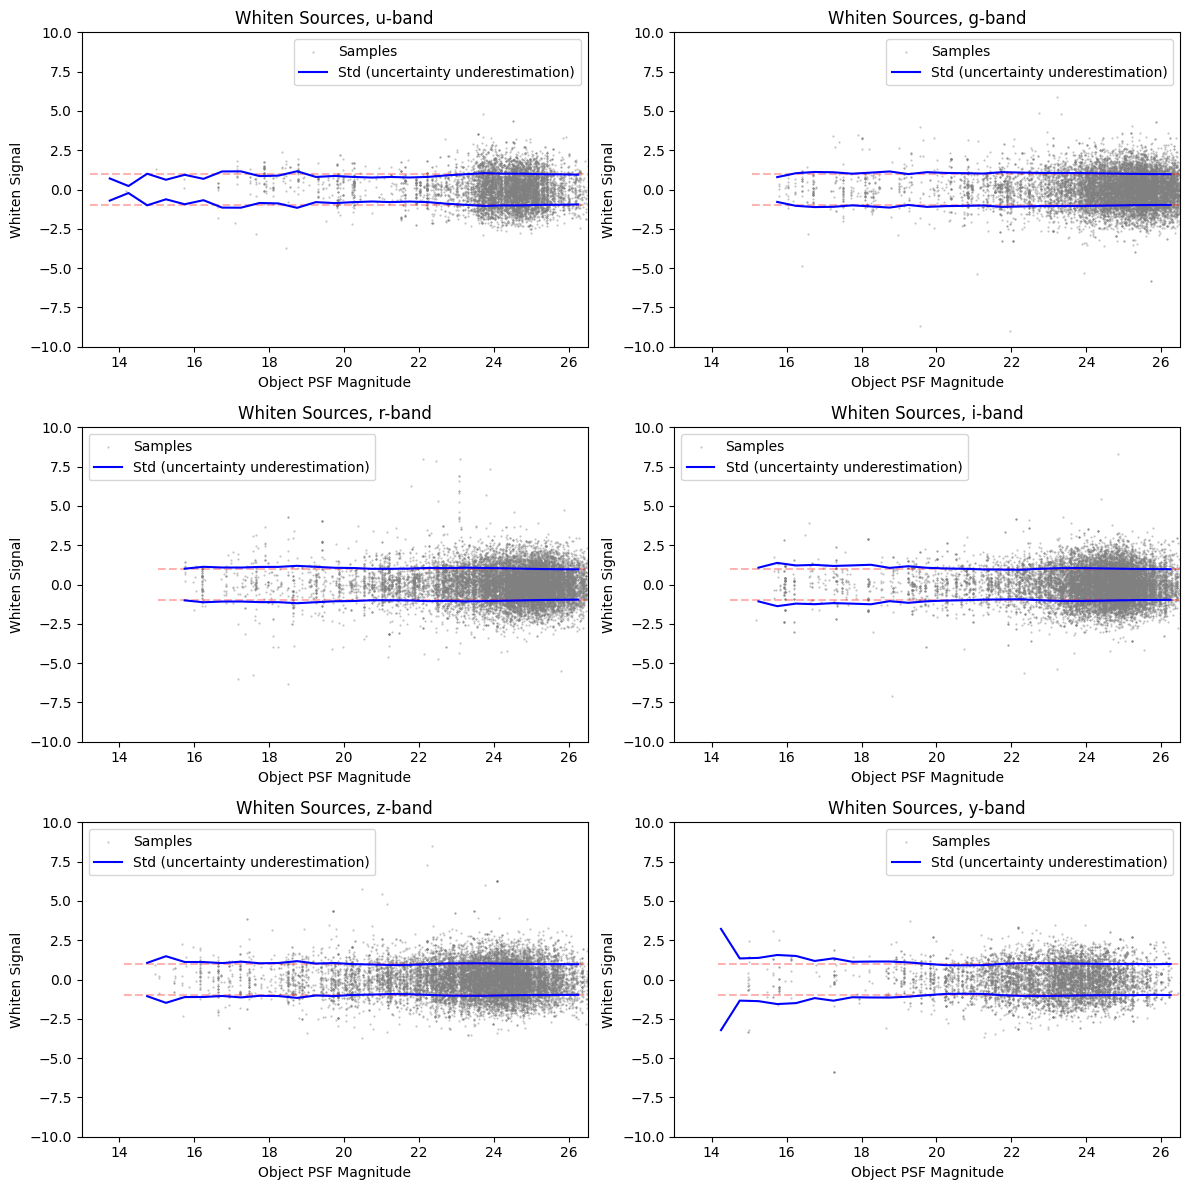

In [6]:
from uncle_val.pipelines import make_plots
from uncle_val.pipelines.splits import TEST_SPLIT

make_plots(
    dp1_root=DP1_ROOT,
    hash_range=TEST_SPLIT,
    min_n_src=N_SRC,
    non_extended_only=False,
    n_workers=LSDB_WORKERS,
    model_path=model_path,
    model_columns=model_columns,
    # model_path="./runs/2025-11-21_16-56/mlp.pt",
    # model_columns=['lc.x', 'lc.err', 'extendedness', 'lc.skyBg', 'lc.seeing', 'lc.expTime', 'is_u_band', 'is_g_band', 'is_r_band', 'is_i_band', 'is_z_band', 'is_y_band'],
    device=DEVICE,
    n_samples=5,
    object_mags=[18, 21, 25],
)